In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('Marvel Movies.csv')

In [4]:
df.head(10)

,movie,category,year,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend
0,Ant-Man,Ant-Man,2015,518,398%,83%,85%,-2%,130.0,180,338,57.0,24.0,-58%,31.8,34.70%,65.30%,43.80%
1,Ant-Man & The Wasp,Ant-Man,2018,623,479%,87%,80%,7%,130.0,216,406,75.8,29.0,-62%,35.0,34.70%,65.20%,58.30%
2,Avengers: Age of Ultron,Avengers,2015,1395,382%,76%,82%,-6%,365.0,459,936,191.0,77.0,-60%,41.7,32.90%,67.10%,52.30%
3,Avengers: End Game,Avengers,2019,2797,699%,94%,90%,4%,400.0,858,1939,357.0,147.0,-59%,41.6,30.70%,69.30%,89.30%
4,Avengers: Infinity War,Avengers,2018,2048,683%,85%,91%,-6%,300.0,678,1369,257.0,114.0,-56%,38.0,33.10%,66.80%,85.70%
5,Black Panther,Black Panther,2018,1336,668%,96%,79%,17%,200.0,700,636,202.0,111.0,-45%,28.9,52.40%,47.60%,101.00%
6,Black Panther 2,Black Panther,2022,855,342%,84%,94%,-10%,250.0,453,401,181.0,66.0,-64%,48.6,53.00%,46.90%,72.40%
7,Black Widow,Unique,2021,379,190%,79%,80%,-1%,200.0,183,196,80.3,25.8,-68%,43.8,48.30%,51.70%,40.20%
8,Captain America,Captain America,2011,370,264%,79%,75%,4%,140.0,176,193,65.0,25.0,-62%,36.8,47.60%,52.20%,46.40%
9,Captain America: Civil War,Captain America,2016,1151,460%,90%,89%,1%,250.0,408,743,179.0,72.6,-59%,43.9,35.40%,64.60%,71.60%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   movie                           36 non-null     object 
 1   category                        36 non-null     object 
 2   year                            36 non-null     int64  
 3   worldwide gross ($m)            36 non-null     int64  
 4   % budget recovered              36 non-null     object 
 5   critics % score                 36 non-null     object 
 6   audience % score                36 non-null     object 
 7   audience vs critics % deviance  36 non-null     object 
 8   budget                          36 non-null     float64
 9   domestic gross ($m)             36 non-null     int64  
 10  international gross ($m)        36 non-null     int64  
 11  opening weekend ($m)            36 non-null     float64
 12  second weekend ($m)             36 non

In [6]:
df.describe()

,year,worldwide gross ($m),budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),% gross from opening weekend
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2017.055556,897.194444,194.347222,360.555556,536.194444,132.888889,55.047222,33.664689
std,4.368357,525.392469,68.063187,179.884001,362.294105,66.307788,28.553343,11.684970
min,2008.000000,265.000000,58.000000,134.000000,130.000000,55.000000,22.100000,0.159700
25%,2014.000000,568.250000,150.000000,215.750000,297.000000,84.000000,34.525000,31.950000
50%,2017.500000,776.500000,183.000000,333.500000,440.500000,119.000000,47.800000,36.600000
75%,2021.000000,1129.750000,231.250000,408.750000,652.500000,175.250000,66.475000,41.625000
max,2023.000000,2797.000000,400.000000,858.000000,1939.000000,357.000000,147.000000,48.600000


In [8]:
df.isnull().sum(axis=0)

movie                             0
category                          0
year                              0
worldwide gross ($m)              0
% budget recovered                0
critics % score                   0
audience % score                  0
audience vs critics % deviance    0
budget                            0
domestic gross ($m)               0
international gross ($m)          0
opening weekend ($m)              0
second weekend ($m)               0
1st vs 2nd weekend drop off       0
% gross from opening weekend      0
% gross from domestic             0
% gross from international        0
% budget opening weekend          0
dtype: int64

In [9]:
# Columns to convert to numeric
cols_to_convert = [
    '% budget recovered',
    'critics % score',
    'audience % score',
    'audience vs critics % deviance',
    '1st vs 2nd weekend drop off',
    '% gross from domestic',
    '% gross from international',
    '% budget opening weekend']

# Convert columns to numeric
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col].str.replace('%', ''), errors='coerce')
# Print data types to verify the conversion
print(df.dtypes)

movie                              object
category                           object
year                                int64
worldwide gross ($m)                int64
% budget recovered                  int64
critics % score                     int64
audience % score                    int64
audience vs critics % deviance      int64
budget                            float64
domestic gross ($m)                 int64
international gross ($m)            int64
opening weekend ($m)              float64
second weekend ($m)               float64
1st vs 2nd weekend drop off         int64
% gross from opening weekend      float64
% gross from domestic             float64
% gross from international        float64
% budget opening weekend          float64
dtype: object


In [10]:
# Assuming your dataset is stored in a variable named 'df'
df['critics % score'] = df['critics % score'].astype(int)
df['audience % score'] = df['audience % score'].astype(int)
df['audience vs critics % deviance'] = df['audience vs critics % deviance'].astype(int)
df['1st vs 2nd weekend drop off'] = df['1st vs 2nd weekend drop off'].astype(int)
df['% gross from opening weekend'] = df['% gross from opening weekend'].astype(float)
df['% gross from domestic'] = df['% gross from domestic'].astype(float)
df['% gross from international'] = df['% gross from international'].astype(float)
df['% budget opening weekend'] = df['% budget opening weekend'].astype(float)

# Print data types to verify the conversion
print(df.dtypes)

movie                              object
category                           object
year                                int64
worldwide gross ($m)                int64
% budget recovered                  int64
critics % score                     int32
audience % score                    int32
audience vs critics % deviance      int32
budget                            float64
domestic gross ($m)                 int64
international gross ($m)            int64
opening weekend ($m)              float64
second weekend ($m)               float64
1st vs 2nd weekend drop off         int32
% gross from opening weekend      float64
% gross from domestic             float64
% gross from international        float64
% budget opening weekend          float64
dtype: object


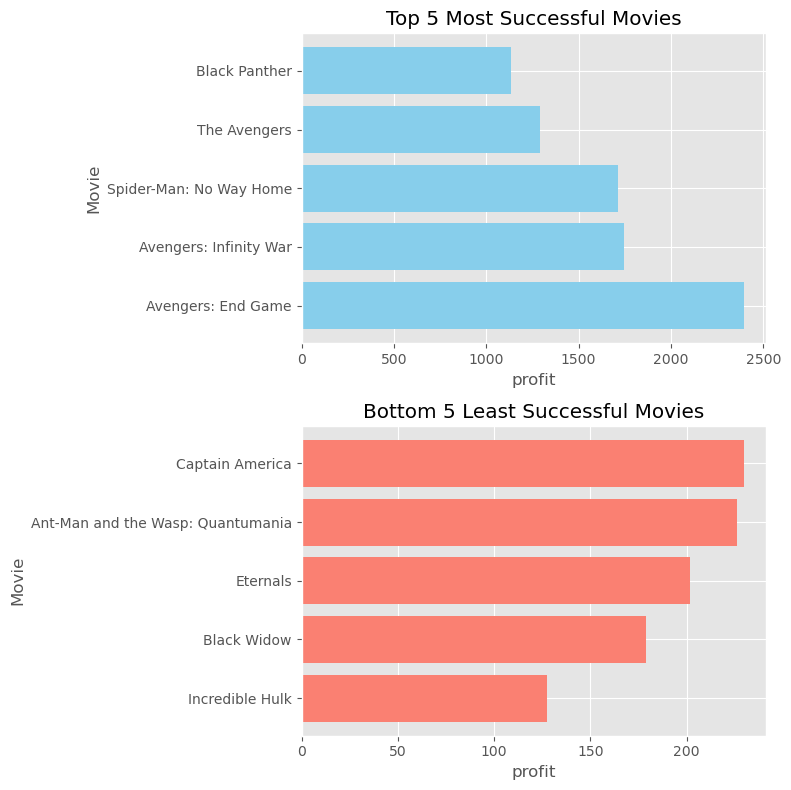

In [11]:
# Calculate profit for each movie
df['profit'] = df['worldwide gross ($m)'] - df['budget']

# Top 5 most successful movies
top_5_successful_movies = df.nlargest(5, 'profit')

# Bottom 5 least successful movies
bottom_5_successful_movies = df.nsmallest(5, 'profit')

import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Top 5 most successful movies
ax[0].barh(top_5_successful_movies['movie'], top_5_successful_movies['profit'],
           color='skyblue')
ax[0].set_xlabel('profit')
ax[0].set_ylabel('Movie')
ax[0].set_title('Top 5 Most Successful Movies')

# Bottom 5 least successful movies
ax[1].barh(bottom_5_successful_movies['movie'], bottom_5_successful_movies['profit'],
           color='salmon')
ax[1].set_xlabel('profit')
ax[1].set_ylabel('Movie')
ax[1].set_title('Bottom 5 Least Successful Movies')

# Adjust layout
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Movies by Category')

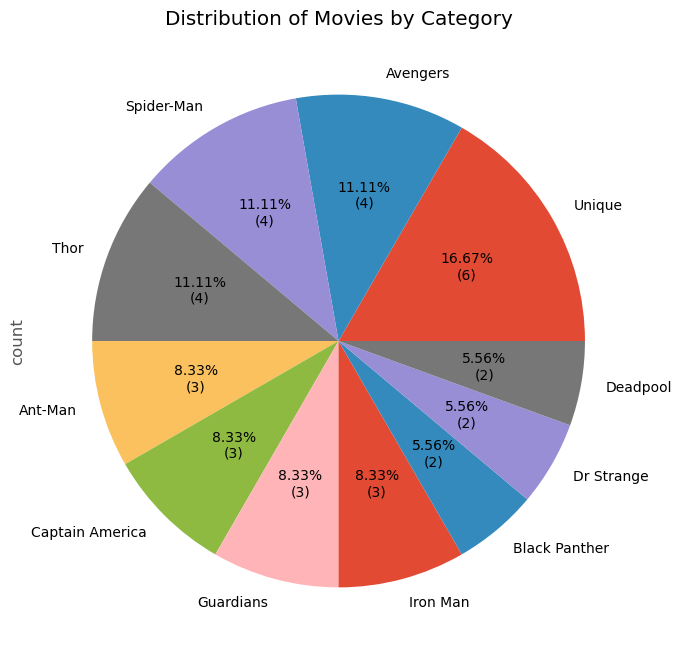

In [12]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.2f}%\n({v:d})'.format(pct, v=val)
        return my_format
    
plt.figure(figsize=(8,8))
df['category'].value_counts().plot.pie(autopct=autopct_format(df['category'].value_counts()))
plt.title('Distribution of Movies by Category')

Text(0.5, 1.0, 'Distribution of Movies by Year')

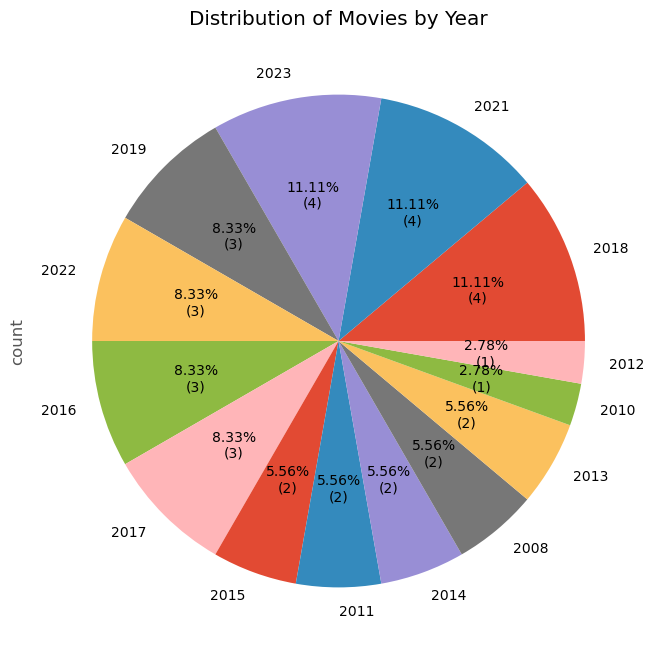

In [13]:
plt.figure(figsize=(8,8))
df['year'].value_counts().plot.pie(autopct=autopct_format(df['year'].value_counts()))
plt.title('Distribution of Movies by Year')

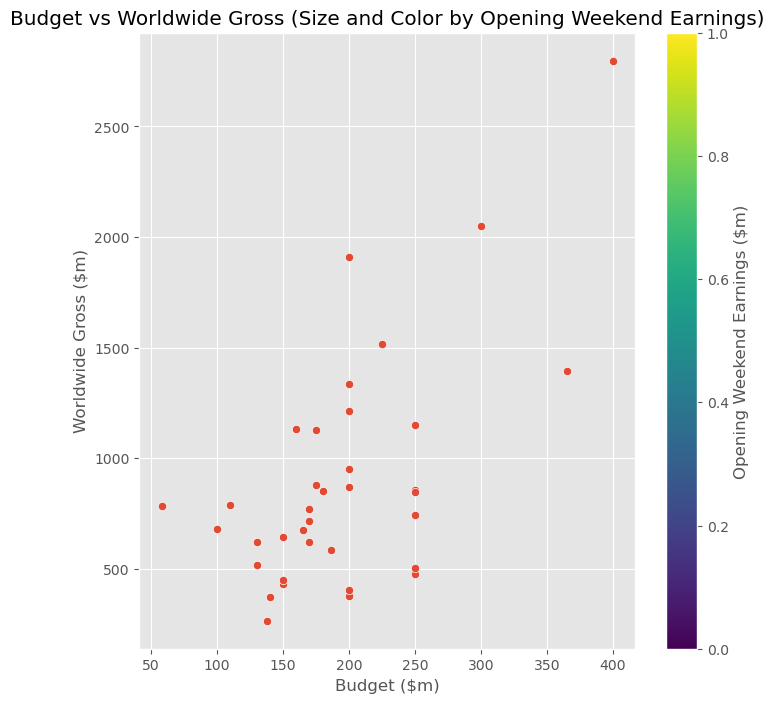

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(8, 8))
scatter = sns.scatterplot(x='budget', y='worldwide gross ($m)', data=df)
plt.xlabel('Budget ($m)')
plt.ylabel('Worldwide Gross ($m)')
plt.title('Budget vs Worldwide Gross (Size and Color by Opening Weekend Earnings)')

# Create a dummy plot for the colorbar
plt.colorbar(scatter.collections[0], label='Opening Weekend Earnings ($m)')
plt.show()

<Figure size 600x600 with 0 Axes>

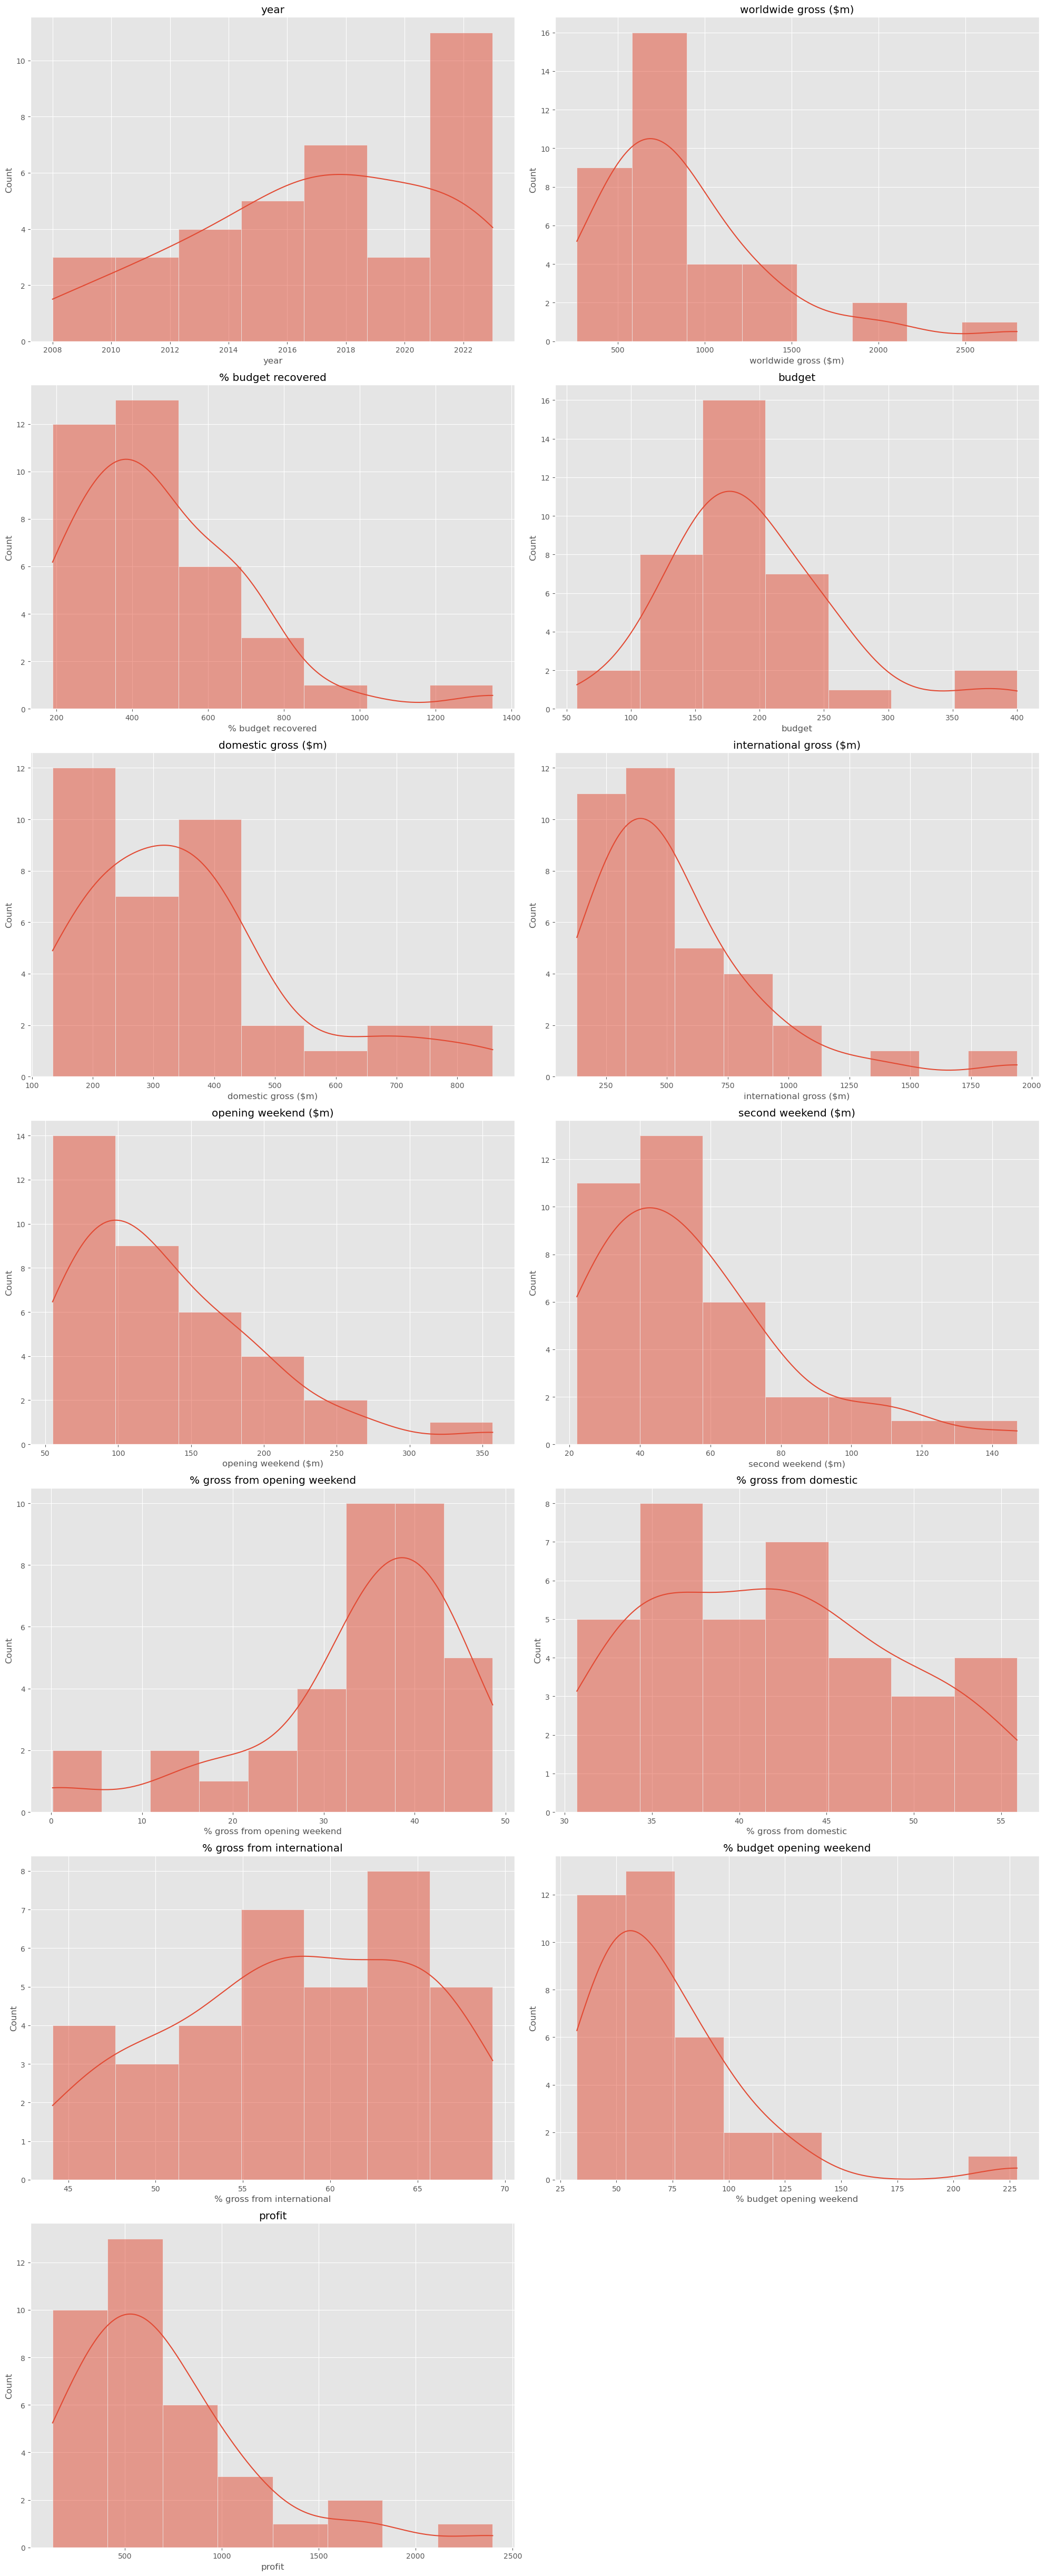

In [15]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(6, 6))
num_cols = 2
num_rows = -(-len(numeric_columns) // num_cols)  # Round up division

plt.figure(figsize=(20, num_rows * 7))
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(x=col, kde=True, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

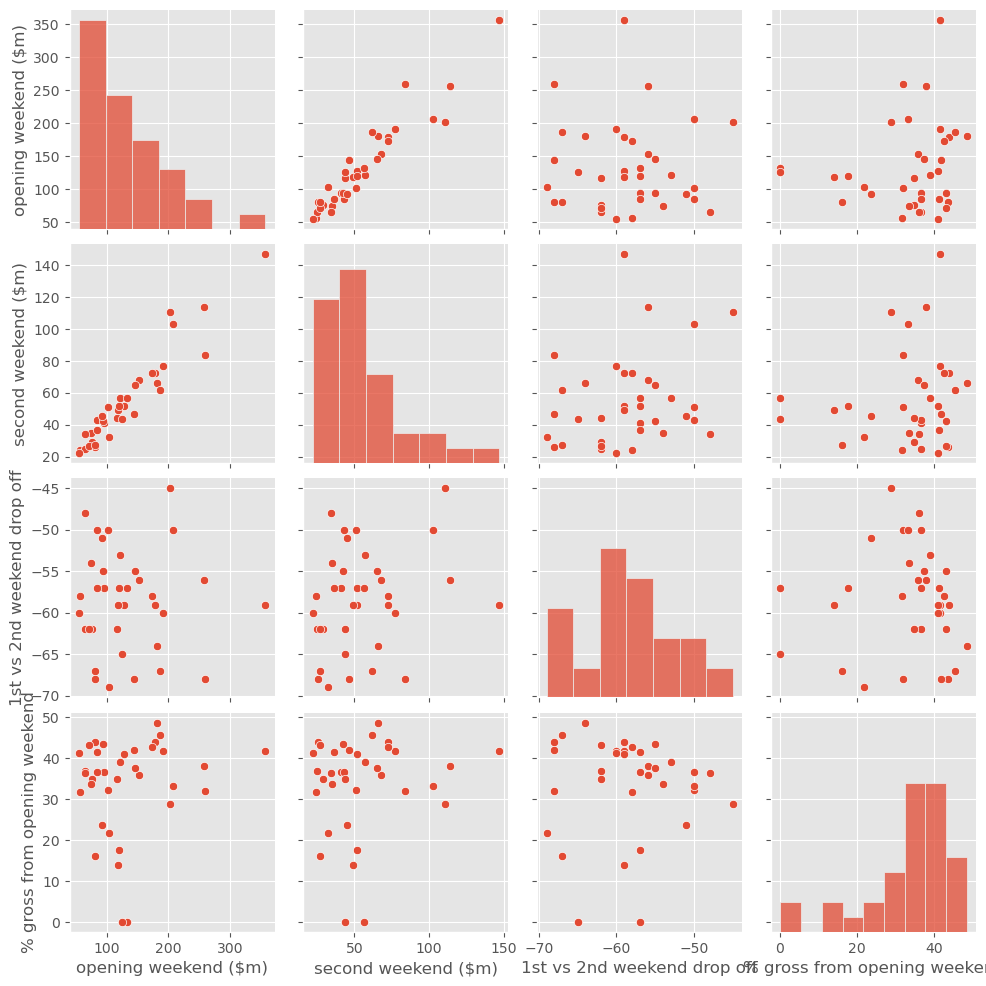

In [16]:
weekend_df= df.loc[:, ['opening weekend ($m)','second weekend ($m)','1st vs 2nd weekend drop off','% gross from opening weekend']]
plt.figure(figsize=(8, 8))
sns.pairplot(weekend_df)

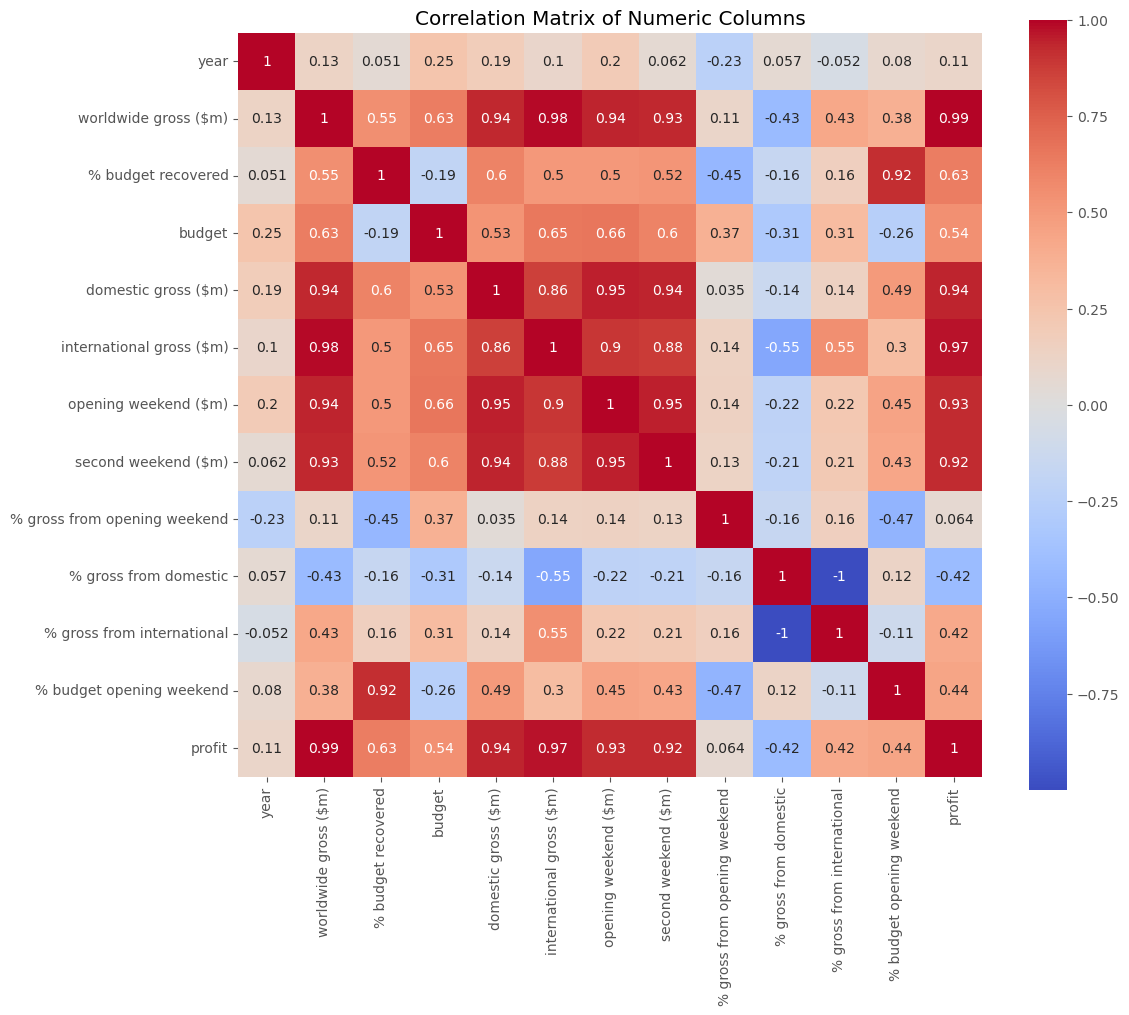

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

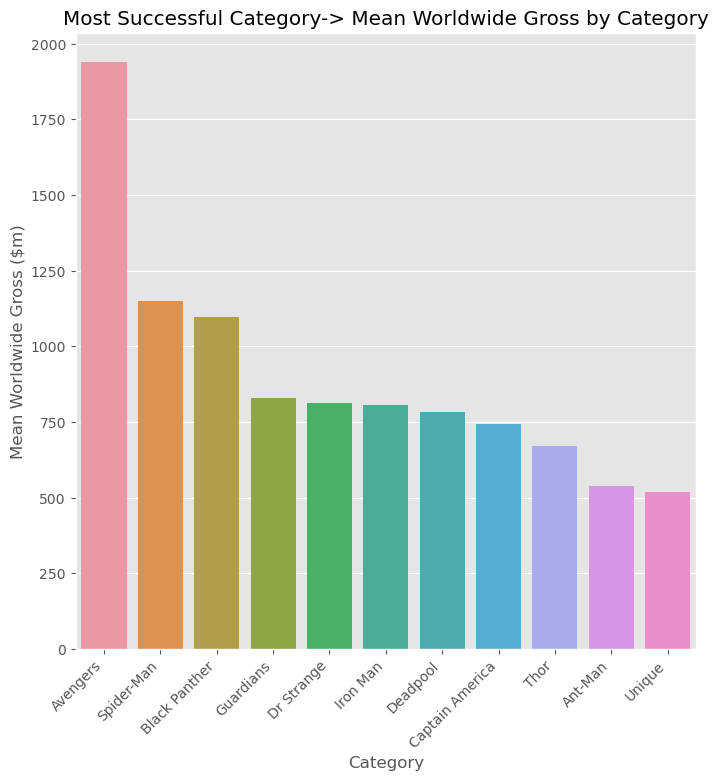

In [18]:
category_success = df.groupby('category')['worldwide gross ($m)'].mean().sort_values(ascending=False)
# Plotting the results
plt.figure(figsize=(8, 8))
sns.barplot(x=category_success.index, y=category_success.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Mean Worldwide Gross ($m)')
plt.title('Most Successful Category-> Mean Worldwide Gross by Category')
plt.show()

<Figure size 1200x800 with 0 Axes>

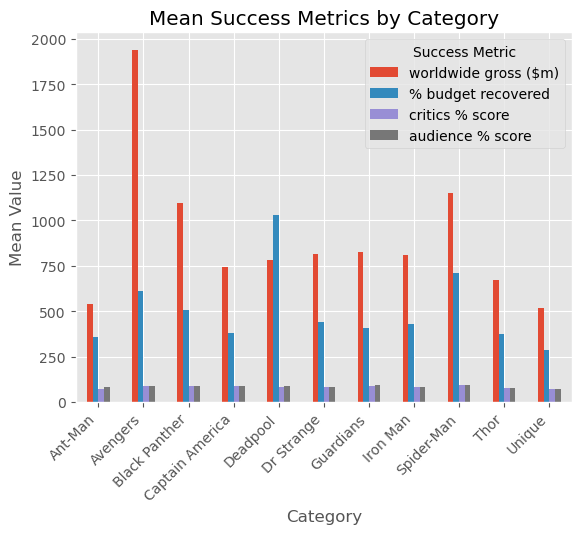

In [19]:
success_metrics = ['worldwide gross ($m)', '% budget recovered', 'critics % score', 'audience % score']

# Calculate mean or median of success metrics for each category
category_success_comparison = df.groupby('category')[success_metrics].mean()

# Plotting the results
plt.figure(figsize=(12, 8))
category_success_comparison.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.title('Mean Success Metrics by Category')
plt.legend(title='Success Metric')
plt.show()